In [1]:
import json
import os
import visualization
import random
import matplotlib.pyplot as plt

### Reading in Predictions and Ground Truths on Validation Set

In [2]:
split = 0.1
#Load all ground truth annotations
with open ("inputs/train_data.json", "r") as data:
    annos = json.load(data)
    #Use only the validation annotations
    val_annos = annos[round(len(annos)*(1-split)):]

with open ("val_output/radian_predictions.json", "r") as pred_file:
    val_preds = json.load(pred_file)
    val_preds = val_preds[0]

### Utility Functions for Visualization

In [4]:
#Generates a filler label for angle visualization from an annotation
def kit_lbl_from_anno(annotation):
    final_str = ""
    final_str += "Car "
    final_str += "0.0 0 0.00 "
    ry = annotation['ry']
    dims = annotation['dimensions']
    loc = annotation['location']
    bbox = annotation['bbox']
    
    final_str += str(bbox[0]) + " " + str(bbox[1]) + " " + str(bbox[2]) + " " + str(bbox[3]) + " "
    final_str += str(dims[0]) + " " + str(dims[1]) + " " + str(dims[2]) + " "
    final_str += str(loc[0]) + " " + str(loc[1]) + " " + str(loc[2]) + " "
    final_str += str(ry)
    return final_str
    

#Generate a label for an angle based on ground truth and predicted ry
def gen_pred_label(gt_label, pred_angle):
    final_str = ""
    gt_tokens = gt_label.split(" ")
    for i in range(0, 14):
        final_str += str(gt_tokens[i]) + " "
    final_str += str(pred_angle)

#Reads in the appropriate image and provides a path to the calibration file
def get_image_and_calib_path(annotation):
    im_id = annotation['image_id']
    img_name = str(im_id).zfill(6)
    img = plt.imread(os.path.join('../../home/ubuntu/kitti-3d-detection-unzipped/training/image_2/', img_name + ".png"))
    return img, os.path.join("../../home/ubuntu/kitti-3d-detection-unzipped/training/calib/", img_name + ".txt")

### Selected Example Results and Visualizations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


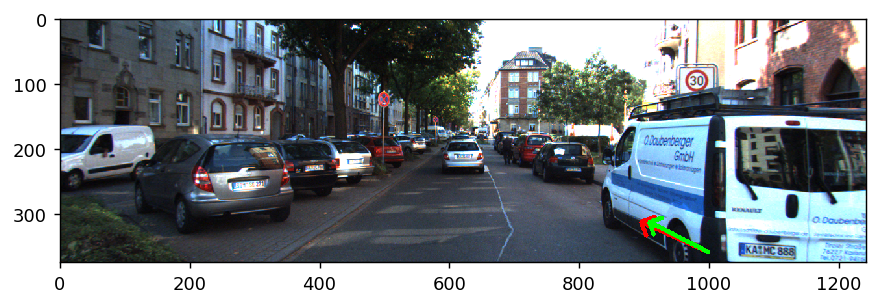

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


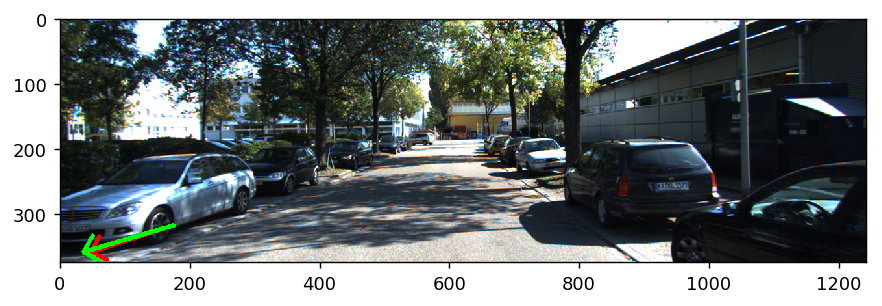

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


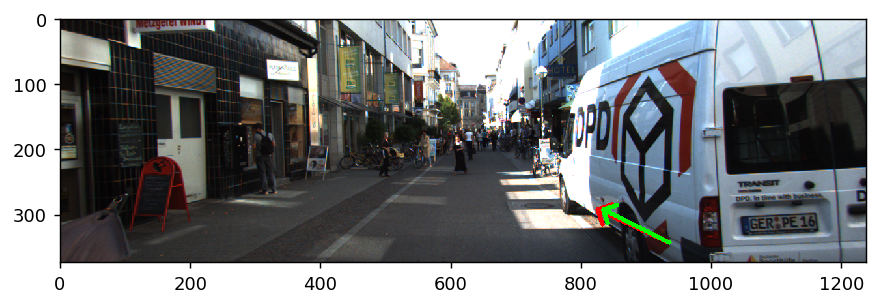

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


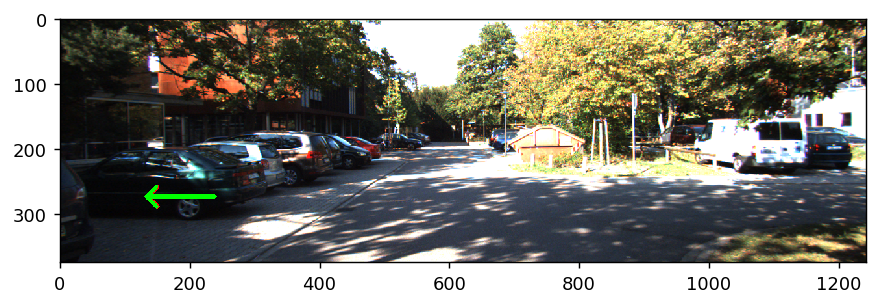

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


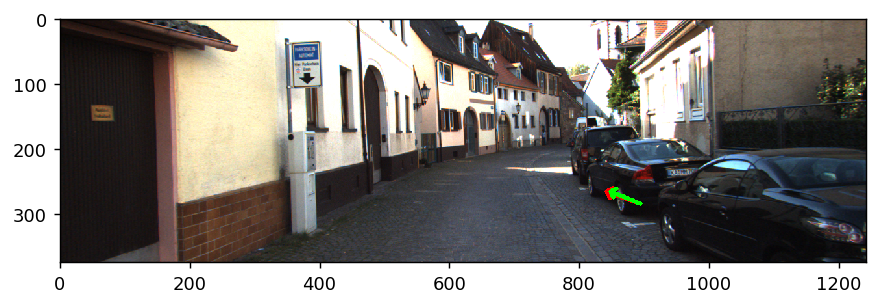

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


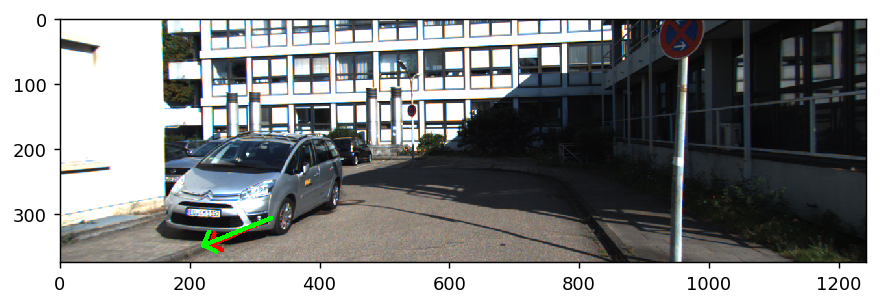

In [46]:
#Some examples of visualizations
for i in [1830, 2631, 900, 850, 466, 1586]:
    #i = random.randint(0, len(val_annos)) #Uncomment this line for random samples of the validation set
    gt_label = kit_lbl_from_anno(val_annos[i])
    gen_pred_label(gt_label, val_preds[str(val_annos[i]['id'])])
    disp_img, calib_path = get_image_and_calib_path(val_annos[i])
    viz = visualization.make_arrow(calib_path, gt_label, disp_img, val_preds[str(val_annos[i]['id'])])
    plt.figure(num=None, figsize=(8, 6), dpi=130, facecolor='w', edgecolor='k')
    plt.imshow(viz)
    plt.show()